## Preprocessing

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***

## 6.a. Generating two-class barely linearly separable data with $p$=2 

In [124]:
x1 = np.random.uniform(low=0.0, high=90.0, size=500)
y1 = np.random.uniform(low=x1+10, high=100.0, size=500)
x1_noise = np.random.uniform(low=20.0, high=80.0, size=50)
y1_noise = (5/4) + (x1_noise - 10) + 0.1

In [125]:
x0 = np.random.uniform(low=10.0, high=100.0, size=500)
y0 = np.random.uniform(low=0.0, high=x0-10, size=500)
x0_noise = np.random.uniform(low=20.0, high=80.0, size=50)
y0_noise = (5/4) + (x0_noise - 10) - 0.1

In [126]:
class1 = range(0,551)
class2 = range(551, 1100)

In [127]:
X = pd.concat([pd.DataFrame([x1]), pd.DataFrame([x1_noise]), pd.DataFrame([x0]), pd.DataFrame([x0_noise])], axis=1).T
X.columns = ['X']
X.head()

,X
0,44.170681
1,26.291981
2,41.145107
3,62.920883
4,12.524779


In [128]:
Y = pd.concat([pd.DataFrame([y1]), pd.DataFrame([y1_noise]), pd.DataFrame([y0]), pd.DataFrame([y0_noise])], axis=1).T
Y.columns = ['Y']
Y.head()

,Y
0,64.059262
1,68.754808
2,80.640348
3,85.004513
4,53.655032


Text(0.5,1,'sample data with barely linearly separable classes')

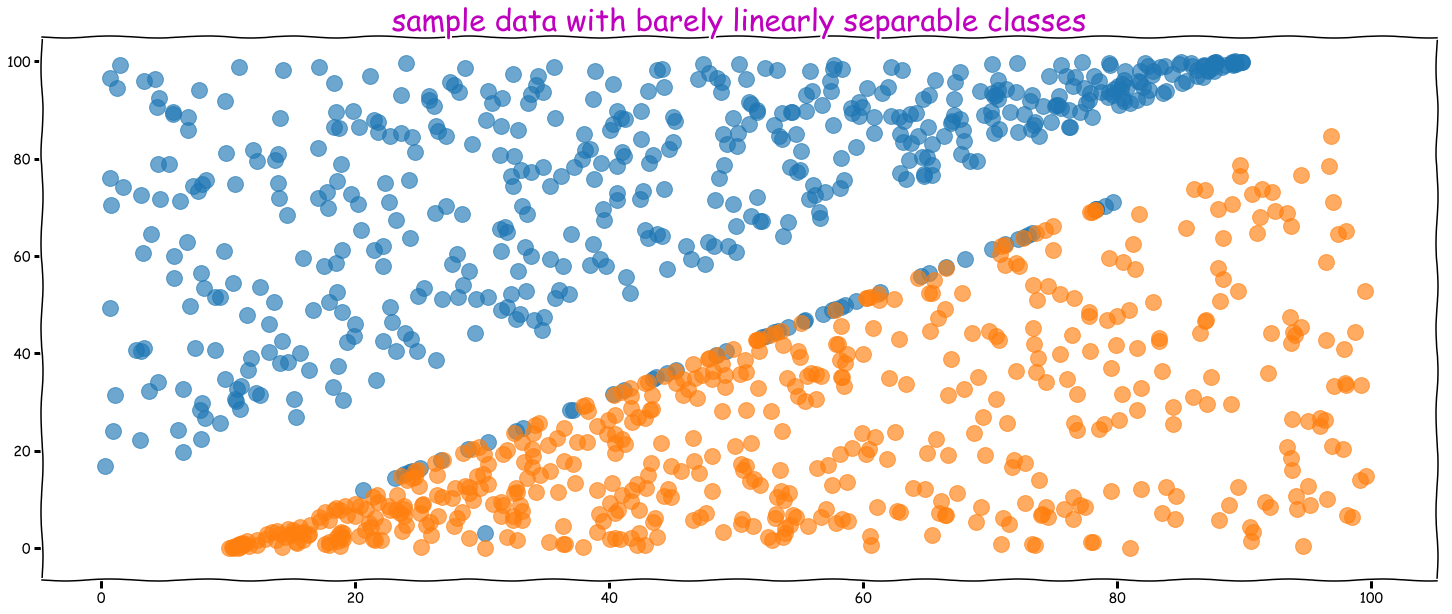

In [130]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(X.iloc[class1], Y.iloc[class1], s=250, alpha=0.65, cmap='viridis')
plt.scatter(X.iloc[class2], Y.iloc[class2], s=250, alpha=0.65, cmap='viridis')
plt.title('sample data with barely linearly separable classes', color='m', fontsize=30)

**This plot creates a barely separable linear boundary at $5x - 4y - 50 = 0.$**

***

## 6.b. Computing cross-validation error rates for support vector classifiers

In [10]:
from sklearn.model_selection import GridSearchCV as GSV
from sklearn.svm import SVC

In [11]:
Z = pd.DataFrame([np.zeros(shape=1100, dtype=int)]).T
Z.iloc[class1] = 1
Z.columns = ['Z']
Z.head()

,Z
0,1
1,1
2,1
3,1
4,1


In [12]:
df = pd.concat([X, Y], axis=1)
df.head()

,X,Y
0,41.194664,79.389921
1,24.103577,55.308233
2,62.307170,91.721553
3,62.874231,82.703817
4,70.420763,93.520529


In [13]:
import warnings
warnings.filterwarnings('ignore')
cost_range = [{'C': [0.01, 0.1, 1, 5, 10, 100, 1000, 10000], 'gamma': [0.5, 1,2,3,4, 5, 6]}]
cost_cv= GSV(SVC(kernel='rbf'), cost_range, cv=10, scoring='accuracy', return_train_score=True).fit(df, Z.Z)

In [14]:
best_params = cost_cv.best_params_
best_params['C']

10

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [34]:
means = pd.DataFrame([cost_cv.cv_results_['mean_test_score']]).T
means.columns = ['means']
means.head()

,means
0,0.500909
1,0.500909
2,0.500909
3,0.500909
4,0.500909


Text(0.5,1,'mean test score')

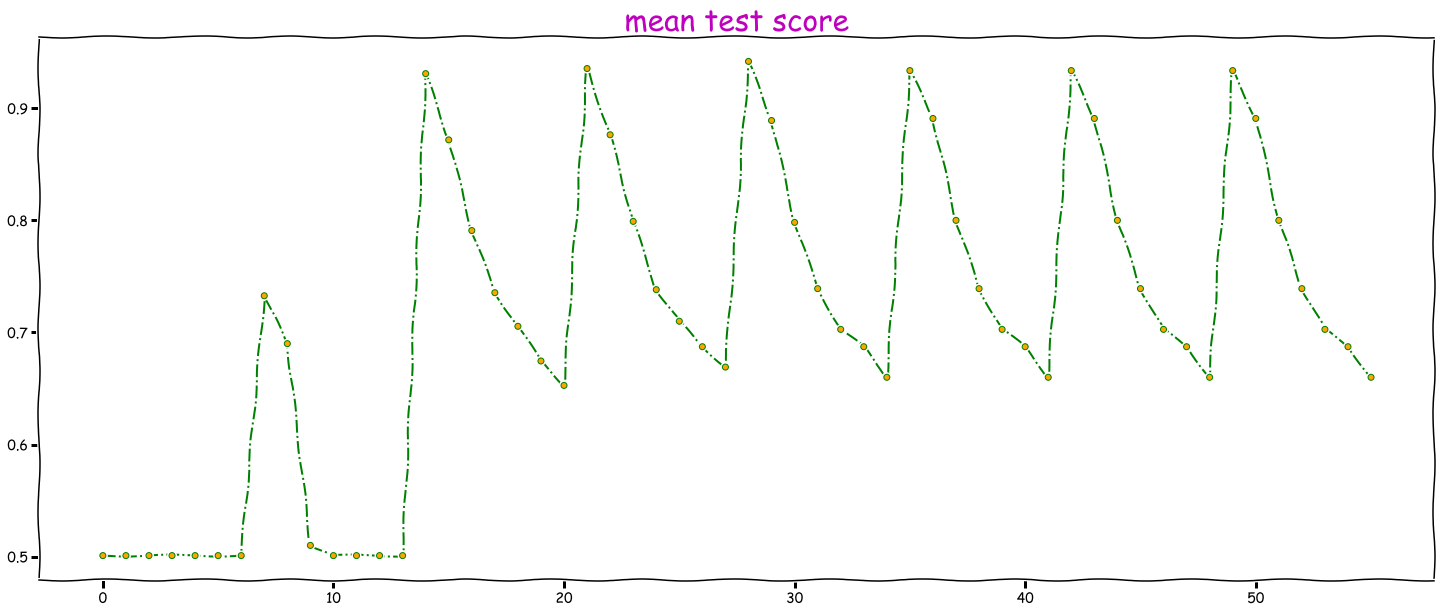

In [35]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(means, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('mean test score', fontsize=30, color='m')

In [36]:
std = pd.DataFrame([cost_cv.cv_results_['std_test_score']]).T
std.columns = ['std']
std.head()

,std
0,0.001818
1,0.001818
2,0.001818
3,0.001818
4,0.001818


Text(0.5,1,'std test score')

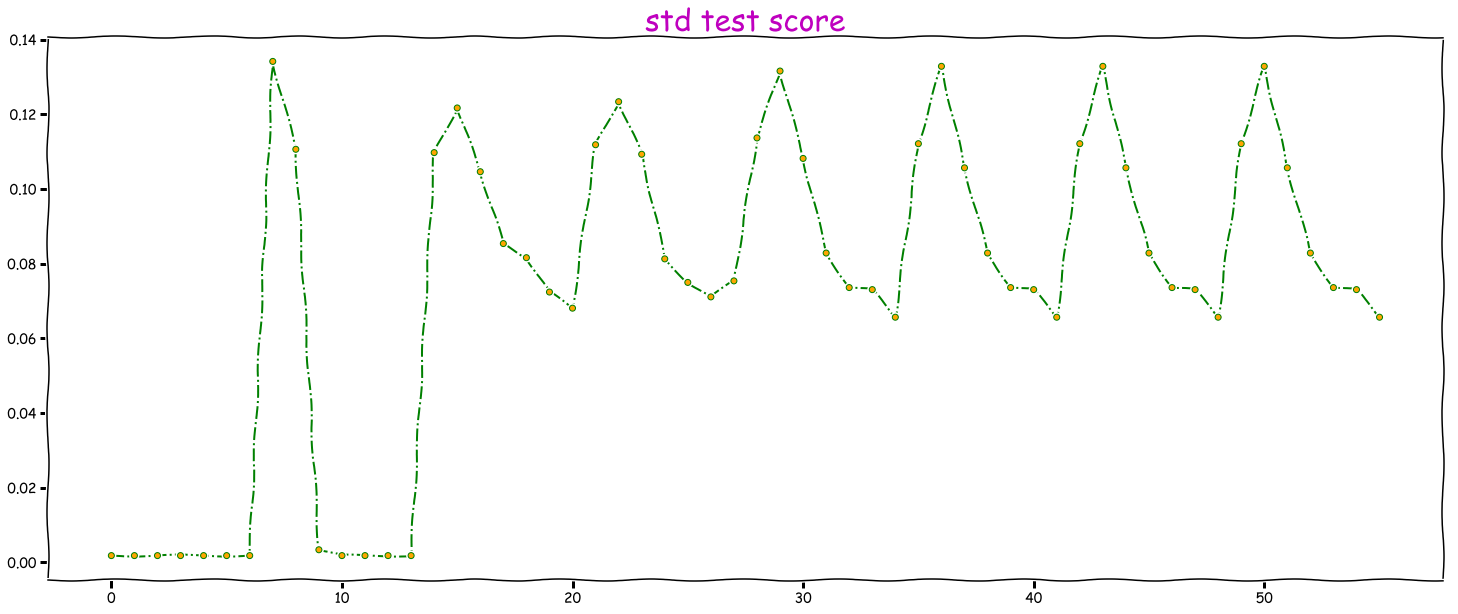

In [37]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(std, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('std test score', fontsize=30, color='m')

In [41]:
resultsdf = pd.concat([means, std], axis=1)
resultsdf.head()

,means,std
0,0.500909,0.001818
1,0.500909,0.001818
2,0.500909,0.001818
3,0.500909,0.001818
4,0.500909,0.001818


In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [72]:
C = [0.01, 0.1, 1, 5, 10, 100, 1000, 10000]
g = [0.5, 1, 2,3,4, 5, 6]

In [74]:
for k in C:
    print(g)

[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]


In [81]:
errdf = pd.DataFrame()
for k in C:
    for p in g:
        svmfit = SVC(C=k, kernel='rbf', gamma=p).fit(df, Z)
        Zpred = svmfit.predict(df)
        class_mat = pd.DataFrame(confusion_matrix(Z, Zpred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
        err_perc = (class_mat.No.No + class_mat.Yes.Yes)/1100 * 100
        errdf = errdf.append(pd.DataFrame([err_perc]))

Text(0.5,1,'number of misclassifications')

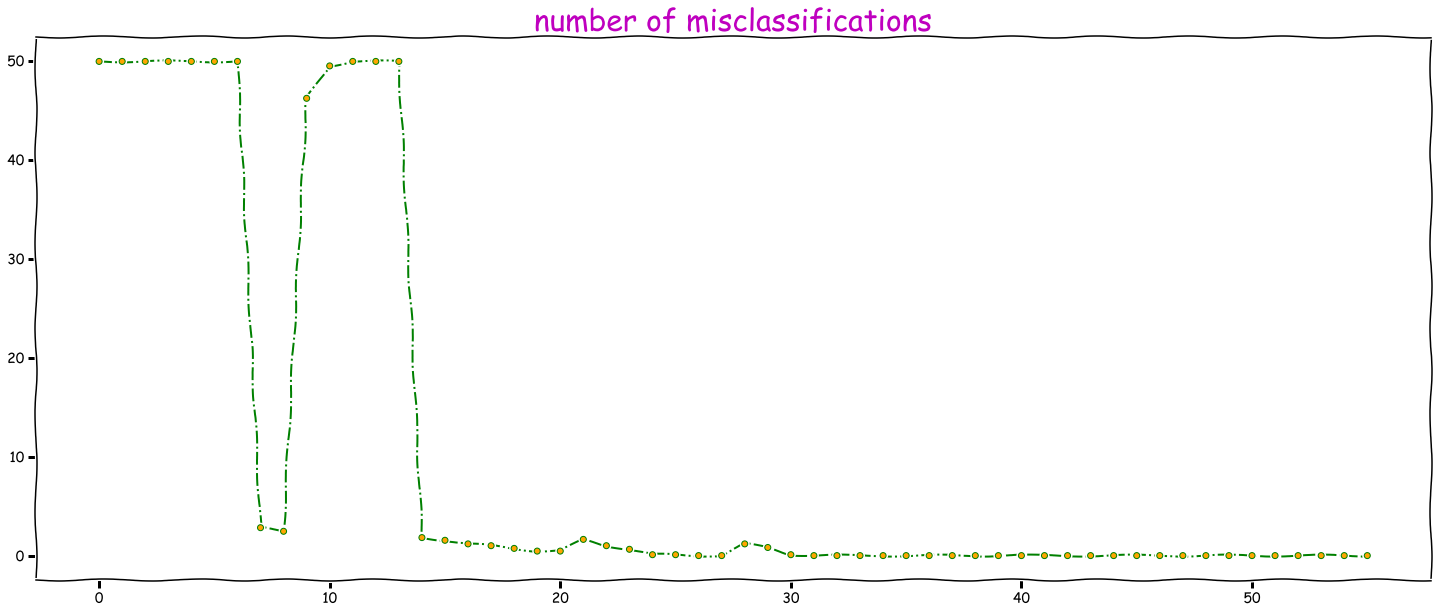

In [93]:
errdf.reset_index(drop=True, inplace=True)
errdf.columns= ['errors']
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(100-errdf, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('number of misclassifications', fontsize=30, color='m')

***

## 6.c. Generating appropriate test data and computing errors for each value of $cost$

In [134]:
X_test = np.random.uniform(low=0.0, high=100.0, size=1000)
class_1 = np.random.randint(low=0, high=1000, size=500)
y_test = np.zeros(1000)

In [135]:
x1_test = np.random.uniform(low=0.0, high=90.0, size=500)
y1_test = np.random.uniform(low=x1_test+10, high=100.0, size=500)
x1_noise_test = np.random.uniform(low=20.0, high=80.0, size=50)
y1_noise_test = (5/4) + (x1_noise_test - 10) + 0.1

In [136]:
x0_test = np.random.uniform(low=10.0, high=100.0, size=500)
y0_test = np.random.uniform(low=0.0, high=x0-10, size=500)
x0_noise_test = np.random.uniform(low=20.0, high=80.0, size=50)
y0_noise_test = (5/4) + (x0_noise_test - 10) - 0.1

In [137]:
class1 = range(0,551)
class2 = range(551, 1100)

In [138]:
X = pd.concat([pd.DataFrame([x1_test]), pd.DataFrame([x1_noise_test]), pd.DataFrame([x0_test]), pd.DataFrame([x0_noise_test])], axis=1).T
X.columns = ['X_test']
X.head()

,X_test
0,66.707809
1,75.248199
2,12.245170
3,51.459218
4,10.384812


In [139]:
Y = pd.concat([pd.DataFrame([y1_test]), pd.DataFrame([y1_noise_test]), pd.DataFrame([y0_test]), pd.DataFrame([y0_noise_test])], axis=1).T
Y.columns = ['Y_test']
Y.head()

,Y_test
0,95.231104
1,86.962887
2,66.381552
3,89.637116
4,52.748297


Text(0.5,1,'test data')

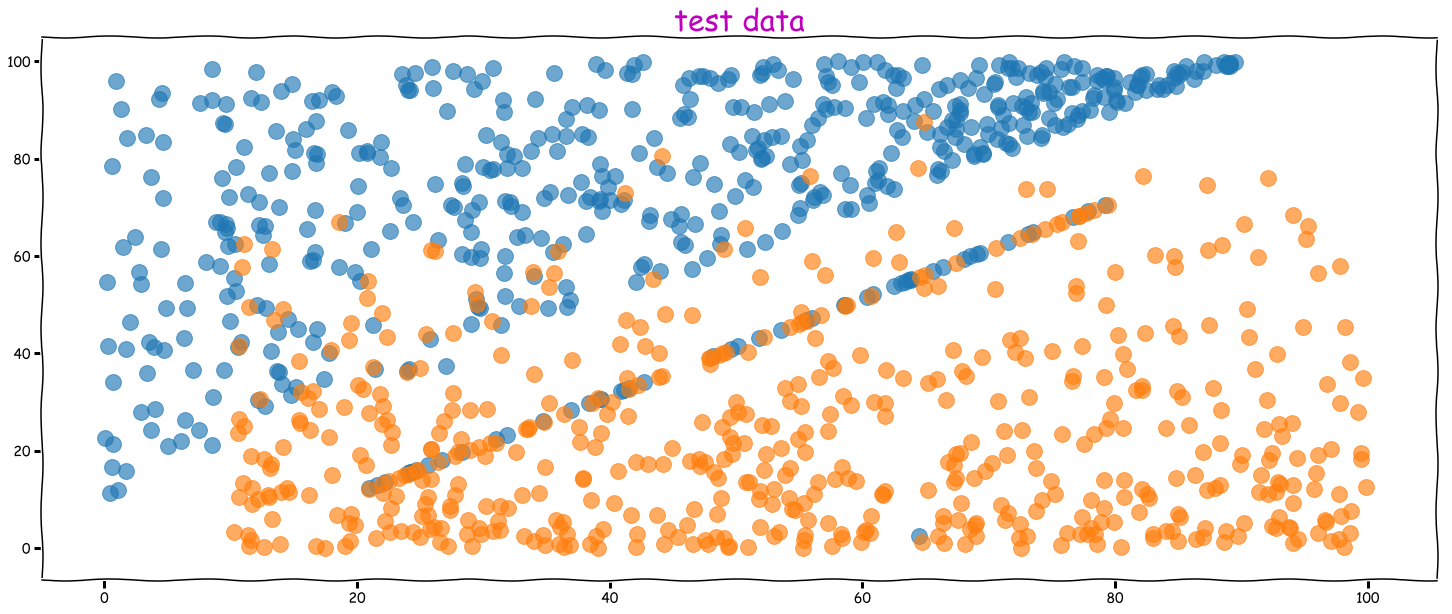

In [140]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(X.iloc[class1], Y.iloc[class1], s=250, alpha=0.65, cmap='viridis')
plt.scatter(X.iloc[class2], Y.iloc[class2], s=250, alpha=0.65, cmap='viridis')
plt.title('test data', color='m', fontsize=30)

In [141]:
Z = pd.DataFrame([np.zeros(shape=1100, dtype=int)]).T
Z.iloc[class1] = 1
Z.columns = ['Z']
Z.head()

,Z
0,1
1,1
2,1
3,1
4,1


In [142]:
df = pd.concat([X, Y], axis=1)
df.head()

,X_test,Y_test
0,66.707809,95.231104
1,75.248199,86.962887
2,12.245170,66.381552
3,51.459218,89.637116
4,10.384812,52.748297


In [143]:
import warnings
warnings.filterwarnings('ignore')
cost_range = [{'C': [0.01, 0.1, 1, 5, 10, 100, 1000, 10000], 'gamma': [0.5, 1,2,3,4, 5, 6]}]
cost_cv= GSV(SVC(kernel='rbf'), cost_range, cv=10, scoring='accuracy', return_train_score=True).fit(df, Z.Z)

In [144]:
best_params = cost_cv.best_params_
best_params['C']

5

In [145]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [146]:
means = pd.DataFrame([cost_cv.cv_results_['mean_test_score']]).T
means.columns = ['means']
means.head()

,means
0,0.500909
1,0.500909
2,0.500909
3,0.500909
4,0.500909


Text(0.5,1,'mean test score')

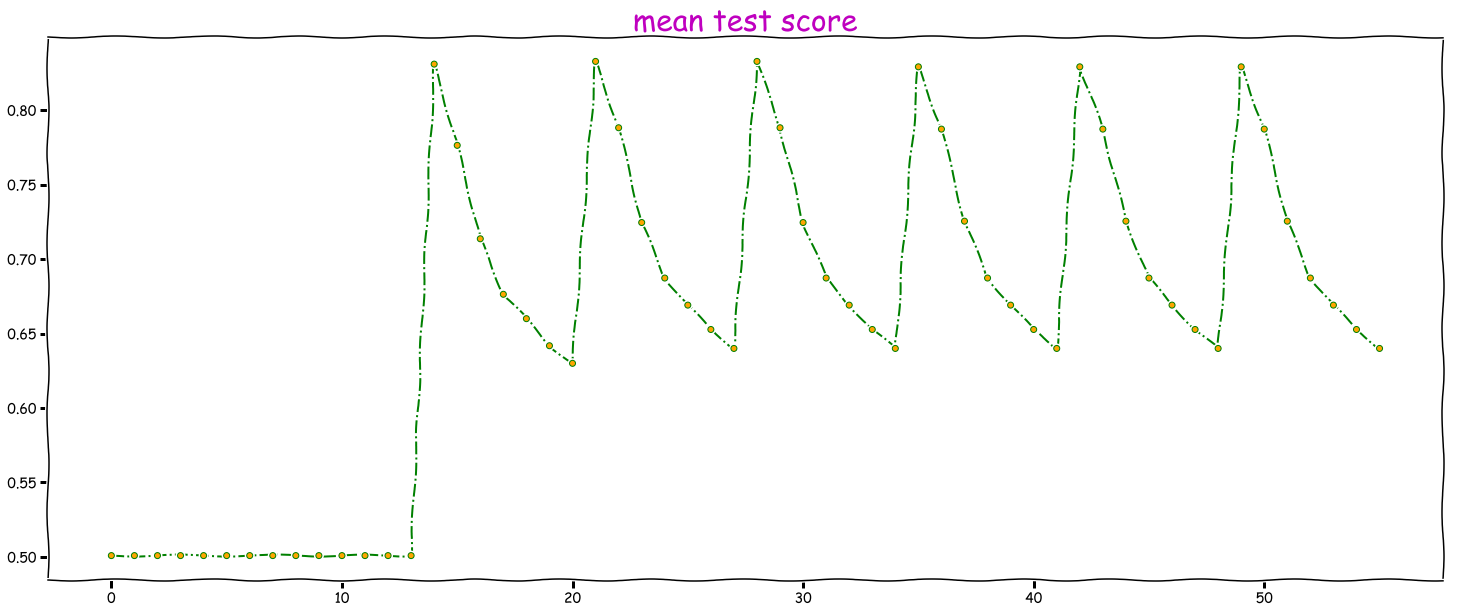

In [147]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(means, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('mean test score', fontsize=30, color='m')

In [148]:
std = pd.DataFrame([cost_cv.cv_results_['std_test_score']]).T
std.columns = ['std']
std.head()

,std
0,0.001818
1,0.001818
2,0.001818
3,0.001818
4,0.001818


Text(0.5,1,'std test score')

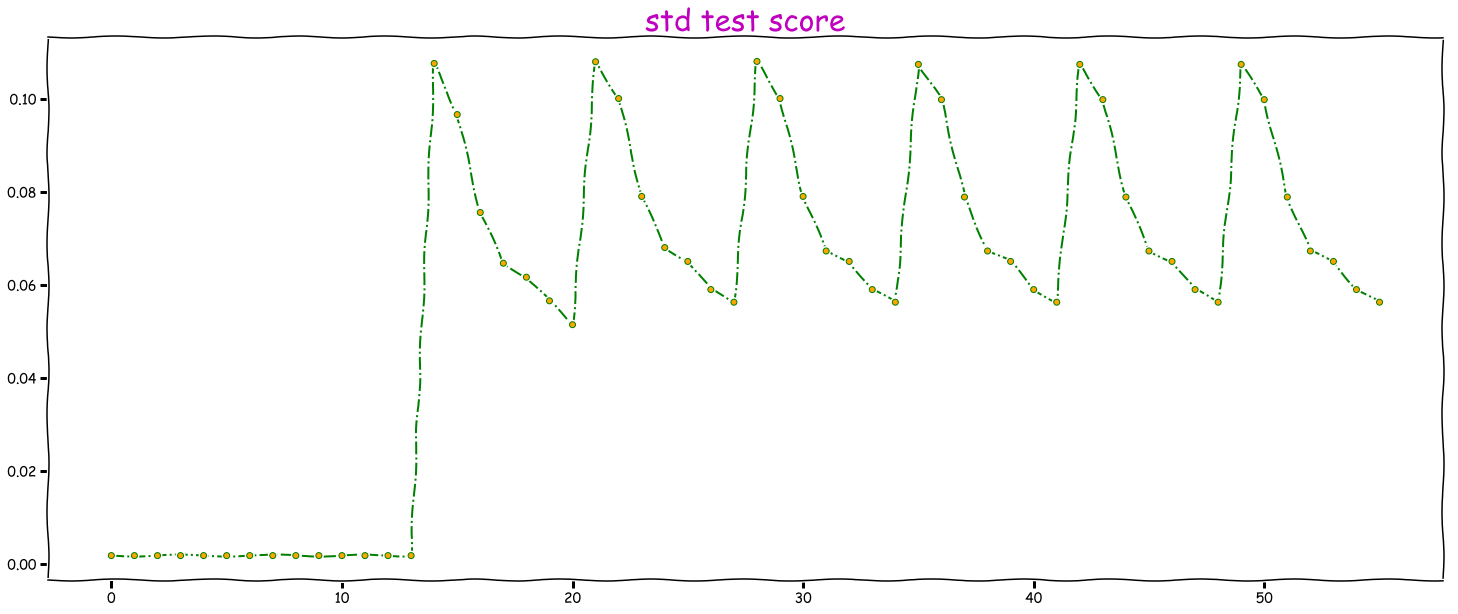

In [149]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(std, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('std test score', fontsize=30, color='m')

In [150]:
resultsdf = pd.concat([means, std], axis=1)
resultsdf.head()

,means,std
0,0.500909,0.001818
1,0.500909,0.001818
2,0.500909,0.001818
3,0.500909,0.001818
4,0.500909,0.001818


In [151]:
from sklearn.metrics import confusion_matrix, classification_report

In [152]:
C = [0.01, 0.1, 1, 5, 10, 100, 1000, 10000]
g = [0.5, 1, 2,3,4, 5, 6]

In [153]:
for k in C:
    print(g)

[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]
[0.5, 1, 2, 3, 4, 5, 6]


In [154]:
errdf = pd.DataFrame()
for k in C:
    for p in g:
        svmfit = SVC(C=k, kernel='rbf', gamma=p).fit(df, Z)
        Zpred = svmfit.predict(df)
        class_mat = pd.DataFrame(confusion_matrix(Z, Zpred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
        err_perc = (class_mat.No.No + class_mat.Yes.Yes)/1100 * 100
        errdf = errdf.append(pd.DataFrame([err_perc]))

Text(0.5,1,'number of misclassifications')

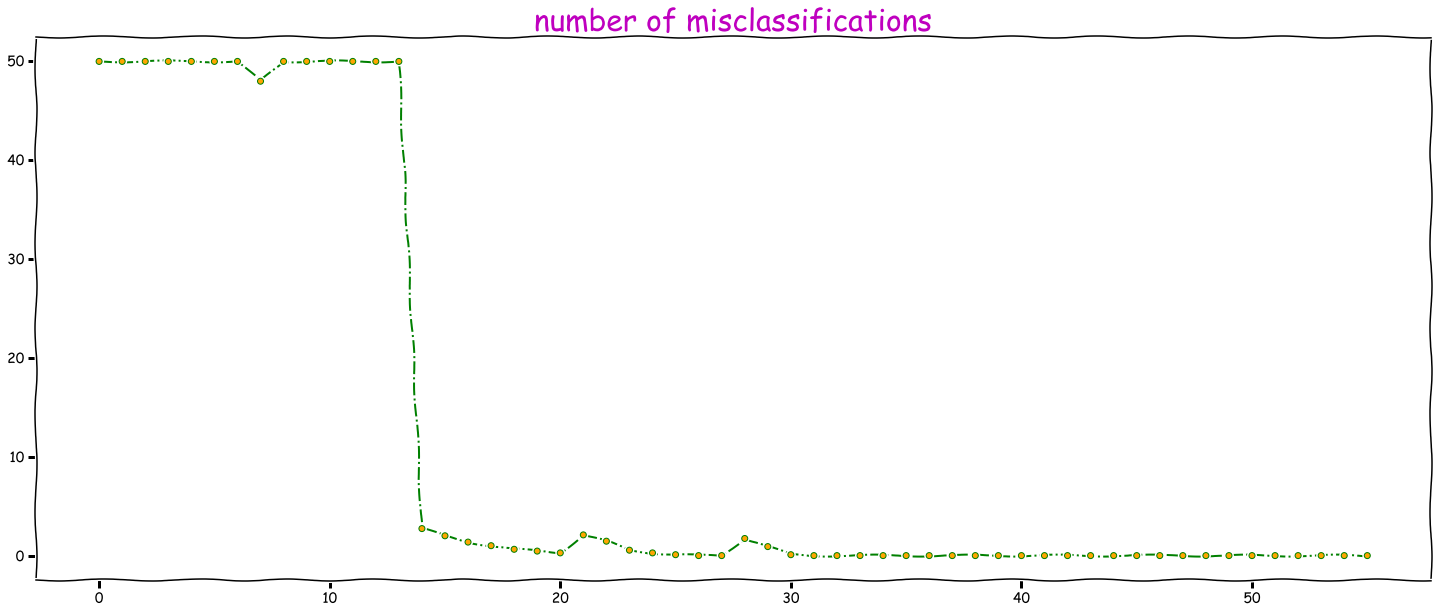

In [155]:
errdf.reset_index(drop=True, inplace=True)
errdf.columns= ['errors']
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(100-errdf, c='g', ls='-.', marker='o', markerfacecolor='orange')
plt.title('number of misclassifications', fontsize=30, color='m')

**$cost$=5 seems to be performing best on test data while $cost$=10 seems to perform best on training data.**

***

## 6.d. Discussion of results

**A large $cost$ results in overfitting and greater misclassification as opposed to a smaller $cost$.**